In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import fisher_exact
from itertools import combinations
import pickle as pkl

In [2]:
results_dir = '../evaluating_responses/part_2/'

In [70]:
dsd = pd.read_csv(results_dir+'deepseek_dist_corrected.csv')
dsd.head()

,Culture,Size,Instance,Type,Answer,Correctness,Response
0,ic,5,0,men_opt,1,1,"Okay, I need to determine whether the given ma..."
1,ic,5,0,women_opt,1,1,"Okay, so I have this problem about determining..."
2,ic,5,0,random_1,0,1,"Okay, so I need to figure out if this matching..."
3,ic,5,0,random,0,1,"Okay, so I need to determine whether the given..."
4,ic,5,1,men_opt,1,1,"Okay, so I need to determine if the given matc..."


In [71]:
dsd[dsd['Answer'] == -1].shape

(15, 7)

In [72]:
dsd[dsd['Answer']!=-1][['Culture', 'Size', 'Type', 'Correctness']].groupby(['Culture', 'Size','Type']).sum()

Correctness
Culture     Size Type                  
ic          5    men_opt             28
                 random              28
                 random_1            25
                 women_opt           30
            10   men_opt             43
                 random              50
                 random_1            49
                 women_opt           46
            20   men_opt             33
                 random              48
                 random_1            42
                 women_opt           28
            50   men_opt             21
                 random              46
                 random_1            26
                 women_opt           17
womanmaster 5    men_opt             10
                 random               9
                 random_1            10
            10   men_opt             45
                 random              50
                 random_1            45
            20   men_opt             40
                 random              50
                 random_1            32
            50   men_opt             27
                 random              43
                 random_1            28

In [73]:
gemini25 = pd.read_csv(results_dir+'gemini25_corrected.csv')
gemini25[gemini25['Answer'] == -1]

,Culture,Size,Instance,Type,Answer,Correctness,Response
82,womanmaster,10,27,random_1,-1,0,```xml\n
212,ic,10,15,random_1,-1,0,```xml\n
366,womanmaster,50,5,random_1,-1,0,```xml\n
377,womanmaster,50,9,men_opt,-1,0,```xml\n
378,womanmaster,50,9,random_1,-1,0,```python\nimport json\n\ndef solve():\n pr...
380,womanmaster,50,10,men_opt,-1,0,```xml\n
402,womanmaster,50,17,random_1,-1,0,```xml\n
404,womanmaster,50,18,men_opt,-1,0,```xml\n
442,womanmaster,50,30,random,-1,0,```python\nimport json\n\ndef solve():\n pr...
449,womanmaster,50,33,men_opt,-1,0,```python\nimport json\n\ndef check_stability(...


In [59]:
for row in gemini25[gemini25['Answer'] == -1].values:
    print(row[-1][-500:])
    print('-------------')

```xml

-------------
```xml

-------------
```xml

-------------
```xml

-------------
ng pair found: ({m}, {w})")
                # print(f"{m} prefers {w} (rank {i}) over {m_partner} (rank {m_partner_rank})")
                # print(f"{w} prefers {m} (rank {m_rank_for_w}) over {w_partner} (rank {w_partner_rank})")
                blocking_pair_found = True
                break # Check next man
        if blocking_pair_found:
            break

    if blocking_pair_found:
        return "No"
    else:
        return "Yes"

result = solve()
print(f"<answer>{result}</answer>")
```
-------------
```xml

-------------
```xml

-------------
```xml

-------------
nt(f"<answer>{result}</answer>")

# Verification with the identified blocking pair (M1, W36) from manual thought process:
# M1 is matched with W13. M1's rank for W13 is 24 (0-indexed). M1's rank for W36 is 1. M1 prefers W36.
# W36 is matched with M2. W36's preference list is the common one.
# Common list: ["M41", ..., "M1"(rank 3

In [74]:
gemini25[gemini25['Answer']!=-1][['Culture', 'Size', 'Type', 'Correctness']].groupby(['Culture', 'Size','Type']).sum()

Correctness
Culture     Size Type                  
ic          10   men_opt             50
                 random              50
                 random_1            47
                 women_opt           50
            20   men_opt             49
                 random              50
                 random_1            45
                 women_opt           41
            50   men_opt             38
                 random              50
                 random_1            41
                 women_opt           36
womanmaster 10   men_opt             50
                 random              50
                 random_1            49
            20   men_opt             45
                 random              50
                 random_1            47
            50   men_opt             44
                 random              49
                 random_1            39

In [75]:
qwen = pd.read_csv(results_dir+'qwen_qwq.csv')
qwen.head()

,Culture,Size,Instance,Prompt,Type,Answer,Correctness,Response
0,ic,5,11,Consider the following instance of the two-sid...,men_opt,1,1,So I have this problem here about matching men...
1,ic,5,16,Consider the following instance of the two-sid...,women_opt,1,1,So I have this problem about matching men and ...
2,ic,5,18,Consider the following instance of the two-sid...,women_opt,0,0,So I've got this problem here about matching m...
3,ic,5,19,Consider the following instance of the two-sid...,men_opt,1,1,So I have this problem here about matching men...
4,ic,5,23,Consider the following instance of the two-sid...,random_1,-1,0,"Alright, I've got this problem here about matc..."


In [76]:
qwen.shape

(1204, 8)

In [77]:
qwen[qwen['Answer'] == -1].shape

(553, 8)

In [78]:
qwen.columns

Index(['Culture', 'Size', 'Instance', 'Prompt', 'Type', 'Answer',
       'Correctness', 'Response'],
      dtype='object')

In [79]:
qwen = pd.read_csv(results_dir+'qwen_qwq_corrected.csv')
qwen.head()

,Culture,Size,Instance,Type,Answer,Correctness,Response
0,ic,5,11,men_opt,1,1,So I have this problem here about matching men...
1,ic,5,16,women_opt,1,1,So I have this problem about matching men and ...
2,ic,5,18,women_opt,0,0,So I've got this problem here about matching m...
3,ic,5,19,men_opt,1,1,So I have this problem here about matching men...
4,ic,5,25,random,0,1,"Alright, I've got this problem here about matc..."


In [80]:
qwen[qwen['Answer'] == -1].shape

(19, 7)

In [81]:
cleaned = []
unaddressed = []
with open(results_dir+'qwen_qwq.csv', 'r') as file:
    reader = csv.reader(file)
    i = 0
    for row in reader:
        # print(len(row), row[-1])
        if i > 3600: break
        i += 1
        if row[5] == "-1":
            if 'text{' in row[-1]:
                answer = row[-1][row[-1].rfind('text{'):row[-1].rfind('text{')+10]
                ans = 1 if 'Yes' in answer else 0
                correct = 0
                if row[4] in ['men_opt', 'women_opt', 'lattice'] and ans:
                    correct = 1
                elif 'random' in row[4] and not ans:
                    correct = 1
                cleaned.append([row[0], row[1], row[2], row[3], row[4], ans, correct, row[-1]])
            else:
                unaddressed.append(row)
        else:
            cleaned.append(row)

In [61]:
print(len(cleaned))

1166


In [51]:
with open(results_dir+'qwen_qwq_cleaned.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(cleaned)

In [52]:
qwen = pd.read_csv(results_dir+'qwen_qwq_cleaned.csv')
qwen.head()

,Culture,Size,Instance,Prompt,Type,Answer,Correctness,Response
0,ic,5,11,Consider the following instance of the two-sid...,men_opt,1,1,So I have this problem here about matching men...
1,ic,5,16,Consider the following instance of the two-sid...,women_opt,1,1,So I have this problem about matching men and ...
2,ic,5,18,Consider the following instance of the two-sid...,women_opt,0,0,So I've got this problem here about matching m...
3,ic,5,19,Consider the following instance of the two-sid...,men_opt,1,1,So I have this problem here about matching men...
4,ic,5,23,Consider the following instance of the two-sid...,random_1,-1,0,"Alright, I've got this problem here about matc..."


In [53]:
qwen.groupby(['Culture', 'Size', 'Type']).mean(['Correctness'])

Instance    Answer  Correctness
Culture     Size Type                                      
ic          5    men_opt        15.0  0.225806     0.580645
                 random         15.0 -0.483871     0.516129
                 random_1       15.0 -0.290323     0.451613
                 women_opt      15.0 -0.032258     0.354839
            10   men_opt        24.5 -0.460000     0.200000
                 random         24.5 -0.460000     0.540000
                 random_1       24.5 -0.420000     0.340000
                 women_opt      24.5 -0.120000     0.340000
            20   men_opt        24.5 -0.520000     0.120000
                 random         24.5 -0.660000     0.260000
                 random_1       24.5 -0.420000     0.380000
                 women_opt      24.5 -0.460000     0.140000
            50   men_opt        24.5 -0.020000     0.260000
                 random         24.5 -0.100000     0.500000
                 random_1       24.5  0.160000     0.480000
                 women_opt      24.5  0.100000     0.280000
womanmaster 5    men_opt         4.5  0.400000     0.700000
                 random          4.5 -0.700000     0.300000
                 random_1        4.5 -0.600000     0.200000
            10   men_opt        24.5 -0.240000     0.340000
                 random         24.5 -0.500000     0.500000
                 random_1       24.5 -0.260000     0.220000
            20   men_opt        24.5 -0.160000     0.360000
                 random         24.5 -0.560000     0.360000
                 random_1       24.5 -0.420000     0.220000
            50   men_opt        24.5  0.160000     0.400000
                 random         24.5 -0.060000     0.420000
                 random_1       24.5  0.120000     0.280000

In [82]:
llama = pd.read_csv(results_dir+'llama33.csv')
llama.head()

,Culture,Size,Instance,Prompt,Type,Answer,Correctness,Response
0,ic,5,0,Consider the following instance of the two-sid...,men_opt,0,0,To determine whether the given matching is sta...
1,ic,5,0,Consider the following instance of the two-sid...,women_opt,0,0,To determine whether the given matching is sta...
2,ic,5,0,Consider the following instance of the two-sid...,random_1,0,1,To determine whether the given matching is sta...
3,ic,5,0,Consider the following instance of the two-sid...,random,0,1,To determine whether the given matching is sta...
4,ic,5,1,Consider the following instance of the two-sid...,men_opt,0,0,To determine whether the given matching is sta...


In [33]:
part2res = os.listdir(results_dir)
part2res = [filename for filename in part2res if 'gemini20' in filename and 'cleaned' not in filename]
gemini = pd.read_csv(results_dir+part2res[0])
for filename in part2res[1:]:
    next_df = pd.read_csv(results_dir+filename)
    gemini = pd.concat([gemini, next_df])
    print(gemini.shape)

gemini.groupby(['Culture', 'Size', 'Type']).mean(['Correctness'])

(400, 10)
(430, 10)
(580, 10)
(730, 10)
(854, 10)
(1004, 10)
(1204, 10)


Instance    Answer  Correctness  Input_tokens  \
Culture     Size Type                                                       
ic          5    men_opt        15.0  0.000000     0.193548           0.0   
                 random         15.0 -0.032258     0.967742           0.0   
                 random_1       15.0 -0.161290     0.838710           0.0   
                 women_opt      15.0  0.032258     0.354839           0.0   
            10   men_opt        24.5 -0.100000     0.340000           0.0   
                 random         24.5 -0.060000     0.900000           0.0   
                 random_1       24.5 -0.040000     0.800000           0.0   
                 women_opt      24.5 -0.080000     0.480000           0.0   
            20   men_opt        24.5 -0.300000     0.420000           0.0   
                 random         24.5 -0.260000     0.740000           0.0   
                 random_1       24.5 -0.420000     0.580000           0.0   
                 women_opt      24.5 -0.320000     0.400000           0.0   
            50   men_opt        24.5 -0.440000     0.480000           0.0   
                 random         24.5 -0.280000     0.680000           0.0   
                 random_1       24.5 -0.540000     0.420000           0.0   
                 women_opt      24.5 -0.500000     0.540000           0.0   
womanmaster 5    men_opt         4.5  0.100000     0.100000           0.0   
                 random          4.5  0.000000     1.000000           0.0   
                 random_1        4.5  0.100000     0.900000           0.0   
            10   men_opt        24.5 -0.080000     0.480000           0.0   
                 random         24.5 -0.120000     0.720000           0.0   
                 random_1       24.5 -0.100000     0.580000           0.0   
            20   men_opt        24.5 -0.380000     0.460000           0.0   
                 random         24.5 -0.180000     0.740000           0.0   
                 random_1       24.5 -0.380000     0.420000           0.0   
            50   men_opt        24.5 -0.400000     0.440000           0.0   
                 random         24.5 -0.360000     0.640000           0.0   
                 random_1       24.5 -0.380000     0.540000           0.0   

                            Output_Tokens  
Culture     Size Type                      
ic          5    men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
                 women_opt            0.0  
            10   men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
                 women_opt            0.0  
            20   men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
                 women_opt            0.0  
            50   men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
                 women_opt            0.0  
womanmaster 5    men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
            10   men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
            20   men_opt              0.0  
                 random               0.0  
                 random_1             0.0  
            50   men_opt              0.0  
                 random               0.0  
                 random_1             0.0

In [83]:
gemini = pd.read_csv(results_dir+'gemini20_corrected.csv')

In [84]:
gemini[gemini['Answer'] == -1].shape

(14, 7)

In [78]:
gemini[gemini['Answer'] == -1].values[1][5]

0

In [76]:
print(gemini[gemini['Answer'] == -1].values[1][-1][-1000:])

                         of men in their preference order.
      matching: A list of pairs (man, woman) representing the matching.

    Returns:
      True if the matching is stable, False otherwise.
    """

    for man, woman in matching:
        for preferred_woman in men_preferences[man]:
            if men_preferences[man].index(preferred_woman) < men_preferences[man].index(woman):
                # Man prefers preferred_woman to his current match
                for other_man, other_woman in matching:
                    if other_woman == preferred_woman:
                        woman_partner = other_man
                        break
                else:
                    woman_partner = None
                if women_preferences[preferred_woman].index(man) < women_preferences[preferred_woman].index(woman_partner):
                    # Woman prefers man to her current match, thus a blocking pair exists
                    return False

    return True
```

</answer>No</answer>

In [84]:
cleaned = [gemini.columns]
for row in gemini.values:
    answer = row[4]
    response = row[-1]
    correct = row[5]
    if answer == -1:
        print("here")
        response = response[:response.rfind('</answer>')].replace('</answer>', '<answer>')
        ans_extract = response[response.rfind('<answer>'):response.rfind('</answer>')]
        if 'Yes' in ans_extract:
            answer = 1
        elif 'No' in ans_extract:
            answer = 0
        else:
            ans_extract = response[-50:]
            print(ans_extract)
            if 'Yes' in ans_extract:
                answer = 1
            elif 'No' in ans_extract:
                answer = 0
            else:
                answer = -1
            print(answer)
            print('------------')
        if row[3] in ['men_opt', 'women_opt', 'lattice'] and answer:
            correct = 1
        elif 'random' in row[3] and answer == 0:
            correct = 1
    cleaned.append([row[0], row[1], row[2], row[3], answer, correct, response])

here

def solve():
    print("Yes")

```

```answer>Yes
1
------------
here
     return False

    return True
```

<answer>No
0
------------
here
5'],['M14', 'W12'],['M15', 'W6'],['M16', 'W13'],['
-1
------------
here
'W49','W48','W35','W21','W11','W42','W20','W39','W
-1
------------
here
','W24','W39','W31','W34','W41','W27','W10','W19',
-1
------------
here
','W2','W41','W16','W25','W13','W28','W18','W42','
-1
------------
here
','W30','W23','W29','W11','W31','W27','W8','W4','W
-1
------------
here
W30','W42','W45','W15'],
'M31': ['W41','W25','W3',
-1
------------
here
,'W35','W4','W14','W13','W2','W26','W41','W17','W2
-1
------------
here
 pair. So, the matching is unstable.

```answer>No
0
------------
here
g pairs, the matching is stable.

```answer
Yes
``
1
------------
here
_stable(matching, preferences)
print(result)

```

-1
------------
here
W42','W12','W4','W44','W7','W2','W48','W34','W6','
-1
------------
here
hon
def solve():
    return "No"
```

```answer>No
0
----------

In [85]:
with open(results_dir+'gemini20_cleaned.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(cleaned)

In [85]:
gemini = pd.read_csv(results_dir+'gemini20_cleaned.csv')
gemini.head()

,Culture,Size,Instance,Type,Answer,Correctness,Response
0,ic,20,0,men_opt,0,0,Let's analyze the given matching and preferenc...
1,ic,20,0,women_opt,1,1,Let's analyze the given matching for stability...
2,ic,20,0,random_1,0,1,Let's analyze the stability of the given match...
3,ic,20,0,random,0,1,Let's analyze the given matching to determine ...
4,ic,20,1,men_opt,0,0,Let's analyze the stability of the given match...


In [86]:
gemini.shape

(1190, 7)

In [87]:
gemini.groupby(['Culture', 'Size', 'Type']).count()

Instance  Answer  Correctness  Response
Culture     Size Type                                              
ic          5    men_opt          28      28           28        28
                 random           30      30           30        30
                 random_1         26      26           26        26
                 women_opt        26      26           26        26
            10   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50
                 women_opt        50      50           50        50
            20   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50
                 women_opt        50      50           50        50
            50   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50
                 women_opt        50      50           50        50
womanmaster 5    men_opt          10      10           10        10
                 random           10      10           10        10
                 random_1         10      10           10        10
            10   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50
            20   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50
            50   men_opt          50      50           50        50
                 random           50      50           50        50
                 random_1         50      50           50        50

In [94]:
gemini[gemini['Answer'] != -1].groupby(['Culture', 'Size', 'Type']).mean(['Correctness'])

Instance    Answer  Correctness
Culture     Size Type                                       
ic          5    men_opt    14.964286  0.107143     0.107143
                 random     14.966667  0.000000     1.000000
                 random_1   13.423077  0.000000     1.000000
                 women_opt  15.192308  0.230769     0.230769
            10   men_opt    24.500000  0.200000     0.200000
                 random     24.500000  0.020000     0.980000
                 random_1   24.500000  0.160000     0.840000
                 women_opt  24.500000  0.340000     0.340000
            20   men_opt    24.500000  0.220000     0.220000
                 random     24.500000  0.000000     1.000000
                 random_1   24.285714  0.163265     0.836735
                 women_opt  24.500000  0.180000     0.180000
            50   men_opt    24.163265  0.102041     0.102041
                 random     24.854167  0.020833     0.979167
                 random_1   25.458333  0.041667     0.958333
                 women_opt  24.040816  0.040816     0.040816
womanmaster 5    men_opt     4.500000  0.100000     0.100000
                 random      4.500000  0.000000     1.000000
                 random_1    4.500000  0.100000     0.900000
            10   men_opt    24.500000  0.340000     0.340000
                 random     24.500000  0.160000     0.840000
                 random_1   24.500000  0.280000     0.720000
            20   men_opt    24.500000  0.180000     0.180000
                 random     24.500000  0.080000     0.920000
                 random_1   24.714286  0.204082     0.795918
            50   men_opt    24.714286  0.020408     0.020408
                 random     24.500000  0.020000     0.980000
                 random_1   24.500000  0.100000     0.900000

In [88]:
gemini[gemini['Answer'] == -1].shape

(9, 7)

In [3]:
combined = [['Model', 'Culture', 'Size', 'Type', 'Num_correct', 'Total', 'Fraction']]
file_names = {
    'Gemini-2.0-Flash': 'gemini20_cleaned.csv',
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-Pro': 'gemini25_corrected.csv',

}

type_names = {
    'men_opt': "Optimal",
    'women_opt': "Pessimal",
    'random_1': "One-BP",
    'random': "Random"
}
for model in file_names:
    model_data = pd.read_csv(results_dir+file_names[model])
    cultures = model_data['Culture'].unique()
    sizes = model_data['Size'].unique()
    types = model_data['Type'].unique()
    for culture in cultures:
        for size in sizes:
            if size < 10: continue
            for typ in types:
                correct = len(model_data[(model_data['Culture'] == culture) & (model_data['Size'] == size) & (model_data['Type'] == typ) & (model_data['Correctness'] == 1)])
                total = len(model_data[(model_data['Culture'] == culture) & (model_data['Size'] == size) & (model_data['Type'] == typ)])
                if total:
                    combined.append([model, culture, size, type_names[typ], correct, total, round(correct/total, 2)])
                    if typ == 'men_opt' and culture == 'womanmaster':
                        combined.append([model, culture, size, type_names['women_opt'], correct, total, round(correct/total, 2)])

with open(results_dir+'combined.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(combined)

In [105]:
def load_data(file_path):
    """Load the experimental data from a CSV file."""
    return pd.read_csv(file_path)

def perform_pairwise_tests(data, features, correct_col, total_col):
    """Perform pairwise statistical tests for each feature."""
    results = []
    
    for feature in features:
        other_features = [f for f in features if f != feature]
        print(type(data))
        grouped_data = data.groupby(other_features)
        
        for _, group in grouped_data:
            unique_values = group[feature].unique()
            
            for val1, val2 in combinations(unique_values, 2):
                subset1 = group[group[feature] == val1]
                subset2 = group[group[feature] == val2]
                
                if len(subset1) > 0 and len(subset2) > 0:
                    correct1, total1 = subset1[correct_col].sum(), subset1[total_col].sum()
                    correct2, total2 = subset2[correct_col].sum(), subset2[total_col].sum()
                    
                    if total1 > 0 and total2 > 0:
                        # Perform a proportion z-test
                        count = [correct1, correct2]
                        nobs = [total1, total2]
                        stat, pval = proportions_ztest(count, nobs)

                        fdata = [
                            [correct1, total1-correct1],
                            [correct2, total2-correct2]
                        ]
                        stat, pval = fisher_exact(fdata)
                        
                        if pval < 0.05:
                            frac1 = round(correct1/total1, 2)
                            frac2 = round(correct2/total2, 2)
                            if frac1 > frac2:
                                val1, val2, frac1, frac2 = val2, val1, frac2, frac1
                            results.append({
                                'Feature': feature,
                                'Other': group[other_features].values[0],
                                'Value 1': val1,
                                'Frac_1': frac1,
                                'Value 2': val2,
                                'Frac_2': frac2,
                                'Statistic': round(stat,2),
                                'P-Value': round(pval,5)
                            })
    
    return pd.DataFrame(results)

# Example usage:
data = load_data(results_dir+"combined.csv")
features = ["Model", "Culture", "Size", "Type"]
results_df = perform_pairwise_tests(data, features, "Num_correct", "Total")
results_df.to_csv(results_dir+'comparison.csv', index=False)
print(results_df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
    Feature                        Other           Value 1  Frac_1  \
0     Model            [ic, 10, men_opt]  Gemini-2.0-Flash    0.20   
1     Model          [ic, 10, women_opt]  Gemini-2.0-Flash    0.34   
2     Model          [ic, 10, women_opt]         Llama-3.3    0.30   
3     Model             [ic, 20, random]         Llama-3.3    0.80   
4     Model             [ic, 20, random]         Llama-3.3    0.80   
..      ...                          ...               ...     ...   
106    Type  [Qwen-QwQ, womanmaster, 10]           men_opt    0.76   
107    Type  [Qwen-QwQ, womanmaster, 10]          random_1    0.54   
108    Type  [Qwen-QwQ, womanmaster, 10]          random_1    0.54   
109    Type  [Qwen-QwQ, womanmaster, 20]           men_opt    0.68   
110    Type  [Qwen-QwQ, womanmaster, 20]          random_1    0.60   

       

In [17]:
rows = os.listdir(results_dir+'gemini25/ic_50/')
acc = 0
for row_file in rows:
    with open(results_dir+'gemini25/ic_50/'+row_file, 'rb') as file:
        row = pkl.load(file)
        # print(row[2], row[4], row[-2], row[-1], row[6])
        acc += row[6]

print(acc)

121


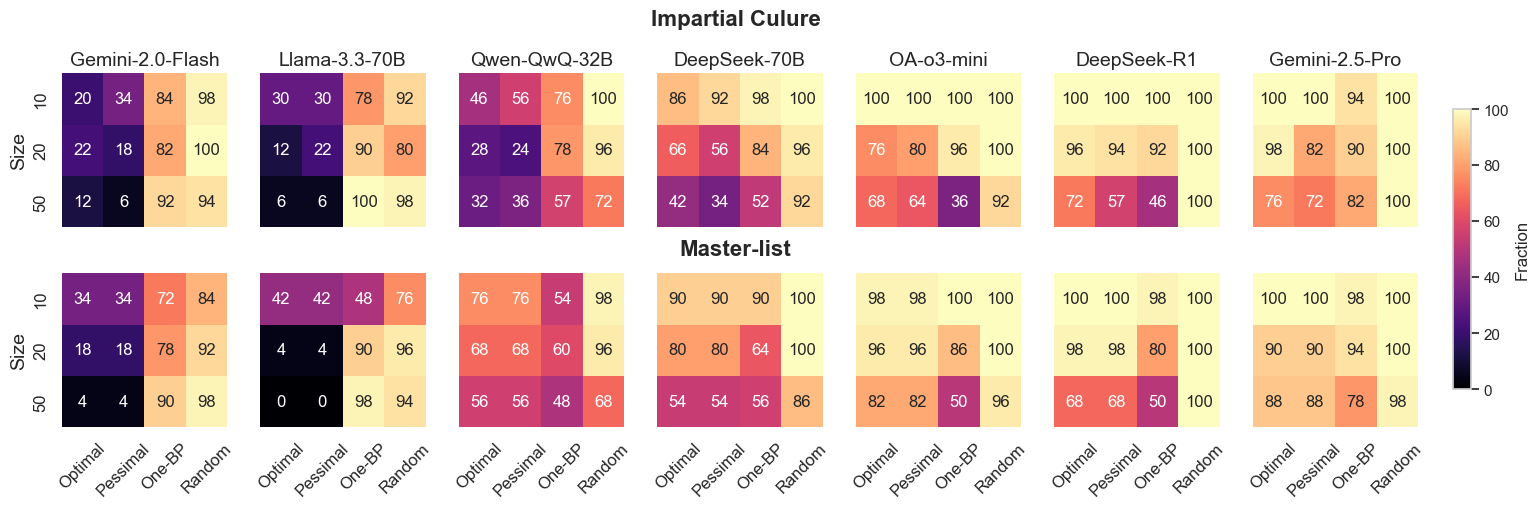

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../evaluating_responses/part_2/combined.csv')

# Define main layout components
cultures = {
    'ic': 'Impartial Culure', 
    'womanmaster': 'Master-list'
}
sizes = sorted(df['Size'].unique())
models = df['Model'].unique()
all_types = df['Type'].unique()
missing_color = 'lightgrey'

# Determine which types are relevant for each culture
culture_types = {
    culture: sorted(df[df['Culture'] == culture]['Type'].unique())
    for culture in cultures
}

# Color scale range
vmin = 0
vmax = 100

# Create main figure
fig = plt.figure(figsize=(2.5 * len(models), 2 * len(cultures)))
subfigs = fig.subfigures(nrows=len(cultures), ncols=1, height_ratios=[1] * len(cultures))

# Loop over each culture and plot heatmaps in its own subfigure
for r, (subfig, culture) in enumerate(zip(subfigs, cultures)):
    subfig.suptitle(f'{cultures[culture]}', fontsize=16, fontweight='bold', y = 1.05 if r else 1.2, x=0.51)

    row_types = all_types
    axs = subfig.subplots(nrows=1, ncols=len(models), sharey=True)

    if len(models) == 1:
        axs = [axs]  # Ensure it's iterable if there's only one model

    for c, (ax, model) in enumerate(zip(axs, models)):
        # Filter the relevant data
        subset = df[(df['Culture'] == culture) & (df['Model'] == model)]

        # Initialize empty matrix
        heat_data = pd.DataFrame(index=sizes, columns=row_types, dtype=float)

        for _, row in subset.iterrows():
            heat_data.at[row['Size'], row['Type']] = row['Fraction']*100

        mask = heat_data.isnull()

        sns.heatmap(
            heat_data.astype(int),
            mask=mask,
            ax=ax,
            annot=True,
            fmt="d",
            cmap="magma",
            cbar=False,
            vmin=vmin,
            vmax=vmax,
            annot_kws={'size': 12}
            # linewidths=0.5,
            # linecolor='black'
        )

        if c == 0: 
            ax.set_ylabel('Size', fontsize=14)
        if r: 
            # ax.set_xlabel('Type', fontsize=14)
            ax.set_xticklabels(ax.get_xticklabels(),  rotation=45, fontsize=14)
        else:
            ax.set_title(model, fontsize=14)
            ax.set_xticklabels(['']*4, rotation=45, fontsize=14)
        # ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
        ax.tick_params(axis='both', labelsize=12)


# Add one colorbar to the side of the entire figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='magma', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Fraction')

# fig.suptitle('Heatmaps of Fraction by Size and Type', fontsize=20, y=0.99)
plt.savefig(results_dir+"fractions_heatmap.pdf", bbox_inches="tight")
plt.show()


In [10]:
combined = pd.read_csv(results_dir+'combined.csv')
combined.head()

,Model,Culture,Size,Type,Num_correct,Total,Fraction
0,Gemini-2.0-Flash,ic,20,Optimal,11,50,0.22
1,Gemini-2.0-Flash,ic,20,Pessimal,9,50,0.18
2,Gemini-2.0-Flash,ic,20,One-BP,41,50,0.82
3,Gemini-2.0-Flash,ic,20,Random,50,50,1.00
4,Gemini-2.0-Flash,ic,50,Optimal,6,50,0.12


In [11]:
data = [['Model', 'Size', 'Type', 'Fraction']]
models = combined['Model'].unique()
sizes = [10, 20, 50]
types = combined['Type'].unique()
for model in models:
    for size in  sizes:
        subset = combined[(combined['Model'] == model) & (combined['Size'] == size) & ((combined['Type'] == 'men_opt') | (combined['Type'] == "women_opt"))]
        total = sum(subset['Num_correct'].values)
        data.append([model, size, 'Stable', round(total/150, 2)])
        subset = combined[(combined['Model'] == model) & (combined['Size'] == size) & ((combined['Type'] == 'random_1') | (combined['Type'] == "random"))]
        total = sum(subset['Num_correct'].values)
        data.append([model, size, 'Unstable', round(total/200, 2)])

with open(results_dir + f"combined_merged.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

In [12]:
data = [['Model', 'Size', 'Type', 'Fraction']]
models = combined['Model'].unique()
sizes = [10, 20, 50]
types = combined['Type'].unique()
for model in models:
    for size in  sizes:
        for t in types:
            subset = combined[(combined['Model'] == model) & (combined['Size'] == size) & (combined['Type'] == t)]
            total = sum(subset['Num_correct'].values)
            # if t == 'women_opt':
            #     total += sum(combined[(combined['Model'] == model) & (combined['Size'] == size) & (combined['Type'] == 'men_opt') & (combined['Culture'] == 'womanmaster')]['Num_correct'].values)
            data.append([model, size, t, round(total/100, 2)])

with open(results_dir + f"combined_merged.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWa

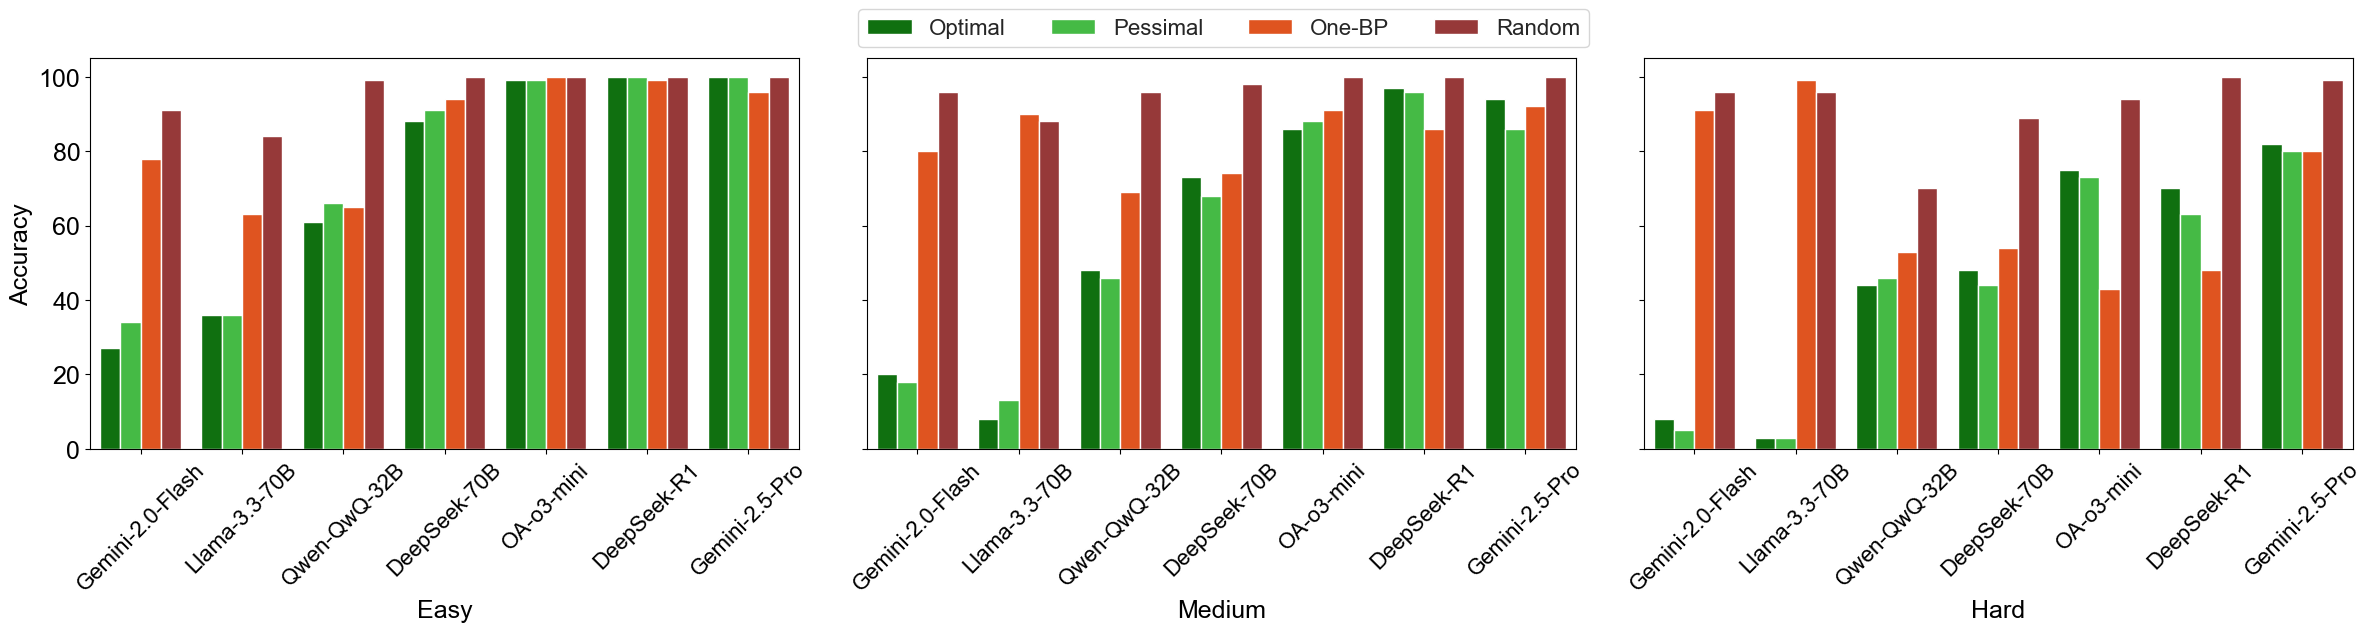

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv(results_dir+"combined_merged.csv")  # Replace with your filename if different

# Define the order of types and sizes
type_order = ["Optimal", "Pessimal", "One-BP", "Random"]
size_order = [10, 20, 50]

# Set up the matplotlib figure with 3 subplots (one for each size)
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
sns.set(style="whitegrid")

palette = {
    'Optimal': 'green',
    'Pessimal': 'limegreen',
    'One-BP': 'orangered',
    'Random': 'brown'
}

size_names = {
     10: "Easy",
     20: "Medium",
     50: "Hard"
}

for i, size in enumerate(size_order):
    ax = axes[i]
    # Filter data for the current size
    data_subset = df[df["Size"] == size]
    
    # Create a grouped barplot
    sns.barplot(
        data=data_subset,
        x="Model",
        y="Fraction",
        hue="Type",
        hue_order=type_order,
        ax=ax,
        palette=palette
    )
    
    ax.set_xlabel(f"{size_names[size]}", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
    ax.set_ylabel("Accuracy" if i == 0 else "", fontsize=18)  # Only first subplot has y-axis label
    ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
                
fig.legend(handles, labels, bbox_to_anchor=(0.67, 1.07), fontsize=16, ncol=4)

plt.tight_layout()
fig.savefig(results_dir+'Evaluating_Stability.pdf', bbox_inches="tight")
plt.show()
